In [74]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
param_dic = {
    "host"      : "localhost",
    "database"  : "hr_db",
    "user"      : "postgres",
    "password"  : "postgres"
}

In [76]:
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [77]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [78]:
conn = connect(param_dic)
column_names = ["emp_no","salary"]
# Execute the "SELECT *" query
employee_df = postgresql_to_dataframe(conn, "select * from salaries", column_names)
employee_df.head()

Connecting to the PostgreSQL database...
Connection successful


,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


In [79]:
conn = connect(param_dic)
column_names = ["emp_no","salary"]
# Execute the "SELECT *" query
df = postgresql_to_dataframe(conn,"select e.emp_no,s.salary from employees as e join salaries as s on e.emp_no=s.emp_no order by s.salary desc", column_names)
df.head()

Connecting to the PostgreSQL database...
Connection successful


,emp_no,salary
0,205000,129492.0
1,44188,127238.0
2,444756,127041.0
3,458302,126703.0
4,37558,125469.0


In [81]:
bins=[40000,45000,50000,60000,70000,80000,90000,100000,120000,125000,130000]

group_names = ['Up to '+str(num) for num in bins][1:]

df["Income_Group"] = pd.cut(df["salary"], 
                                                   bins, labels=group_names, 
                                                   include_lowest=True)

In [82]:
df

,emp_no,salary,Income_Group
0,205000,129492.0,Up to 130000
1,44188,127238.0,Up to 130000
2,444756,127041.0,Up to 130000
3,458302,126703.0,Up to 130000
4,37558,125469.0,Up to 130000
...,...,...,...
236456,48415,40000.0,Up to 45000
236455,48409,40000.0,Up to 45000
236454,280279,40000.0,Up to 45000
236453,280290,40000.0,Up to 45000


In [83]:
df=df[["emp_no","Income_Group"]].groupby(["Income_Group"]).count()
df=df.reset_index()
df=df.rename(columns={"emp_no":"Number of Employees"})
df

,Income_Group,Number of Employees
0,Up to 45000,126277
1,Up to 50000,32195
2,Up to 60000,57917
3,Up to 70000,41405
4,Up to 80000,24814
5,Up to 90000,11844
6,Up to 100000,4285
7,Up to 120000,1263
8,Up to 125000,19
9,Up to 130000,5


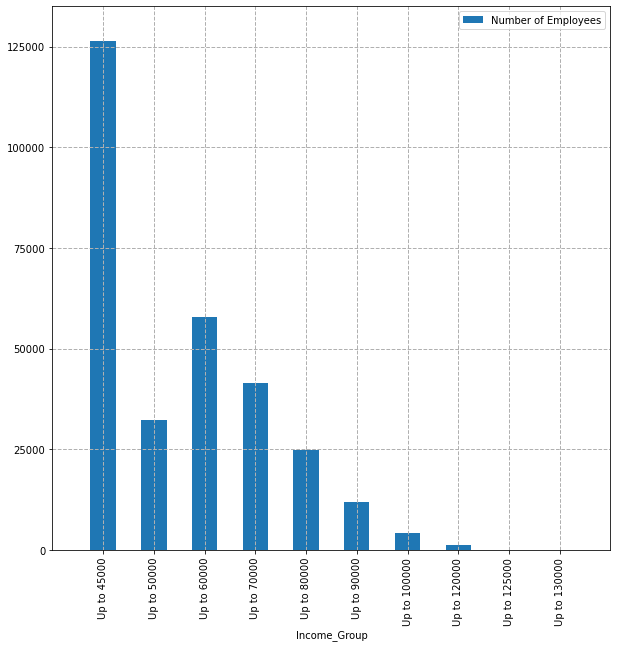

In [92]:
e_y=[0,25000,50000,75000,100000,125000,140000]
df.plot.bar(x="Income_Group",y="Number of Employees")
plt.yticks(e_y)
plt.grid(True, linewidth= 1, linestyle="--")
plt.xlim(-1, 10)
plt.ylim(0,135000)
plt.rcParams["figure.figsize"] = (10, 10)